### R code to make line plot Difference Sensation Level (BC-path - AC-path) in the condition in silence with the Speech-signal at the better-ear-side

25 January 2022, Guido Cattani

In [1]:
library("readxl")
library('data.table')
library("ggplot2")
library("SparseM")
library("quantreg")
library("plyr")   
library("dplyr")


Attaching package: ‘SparseM’


The following object is masked from ‘package:base’:

    backsolve



Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
read_diff_SL <- function(path_in) {
  dt <- read.csv(path_in)
  dt <- dt[ -c(2, 3, 4, 5, 6, 7, 19, 20)]
  # rename columns
  clm = colnames(dt)
  clm= clm[-c(1)]
  newco <- c()
  for (fb in clm){
      f <- strsplit(fb, "_")[[1]][2]
      newco <- c(newco, f)
  }   

newco <- c('Study_ID', newco)
print(newco)
colnames(dt) <- newco
  return(dt)
}

In [3]:
# input file
fin <- 'Diff_SL_65dB_S_bestearside.csv'

In [4]:
# input directory
din <- '/media/guido/LACIE/Cingle_Guido/Master/Implant/Calculated_data/'

# input file path
pin <- paste(din, fin, sep = "")

In [5]:
# output directory
dout = "/media/guido/LACIE/Cingle_Guido/Master/Implant/Figures_R/"

In [6]:
# output path
stm <- gsub('.{4}$', '', fin)
#stm <- gsub('[[:digit:]]+', '', stm)
ext <- '.tiff'
pout <- paste(dout, stm, ext, sep = "")

In [7]:
bh5 <- read_diff_SL(pin)

 [1] "Study_ID" "500"      "630"      "800"      "1000"     "1250"    
 [7] "1600"     "2000"     "2500"     "3150"     "4000"     "5000"    


In [8]:
sbj <- seq(from = 1, to = nrow(bh5))
bh5$BAHA5P_group <- sbj
bh5_long <- melt(setDT(bh5), id.vars = c('Study_ID', 'BAHA5P_group'), 
                 value.name = 'Diff_SL', variable.name = 'Frequency_band')
bh5_long

Study_ID,BAHA5P_group,Frequency_band,Diff_SL
<int>,<int>,<fct>,<dbl>
34,1,500,-49.4
35,2,500,-34.5
43,3,500,-28.3
47,4,500,-40.4
50,5,500,-48.6
53,6,500,-30.5
54,7,500,-29.7
56,8,500,-39.3
59,9,500,-40.2


In [9]:
q <- t(do.call("rbind", tapply(bh5_long$Diff_SL, bh5_long$Frequency_band, quantile, c(0.1, 0.5, 0.9))))
q <- as.data.frame(q)
p <- c("P10", "P50", "P90")
q$Percentile <- p
q

,500,630,800,1000,1250,1600,2000,2500,3150,4000,5000,Percentile
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
10%,-48.68,-38.73,-29.11,-28.61,-25.16,-25.15,-22.49,-17.74,-16.30,-15.93,-32.20,P10
50%,-39.75,-30.55,-21.10,-19.65,-18.85,-16.25,-14.40,-7.10,-3.30,-7.50,-22.80,P50
90%,-30.42,-22.17,-14.54,-12.68,-14.31,-11.22,-4.83,1.86,10.55,7.36,-6.14,P90


In [10]:
P10 = q %>% slice(1)
P50 = q %>% slice(2)
P90 = q %>% slice(3)

In [11]:
P10_long <- melt(setDT(P10), id.vars = c('Percentile'), 
                 value.name = 'Diff_SL', variable.name = 'Frequency_band')
P50_long <- melt(setDT(P50), id.vars = c('Percentile'), 
                 value.name = 'Diff_SL', variable.name = 'Frequency_band')
P90_long <- melt(setDT(P90), id.vars = c('Percentile'), 
                 value.name = 'Diff_SL', variable.name = 'Frequency_band')

In [12]:
# Make plots wider 
options(repr.plot.width=8, repr.plot.height=6)

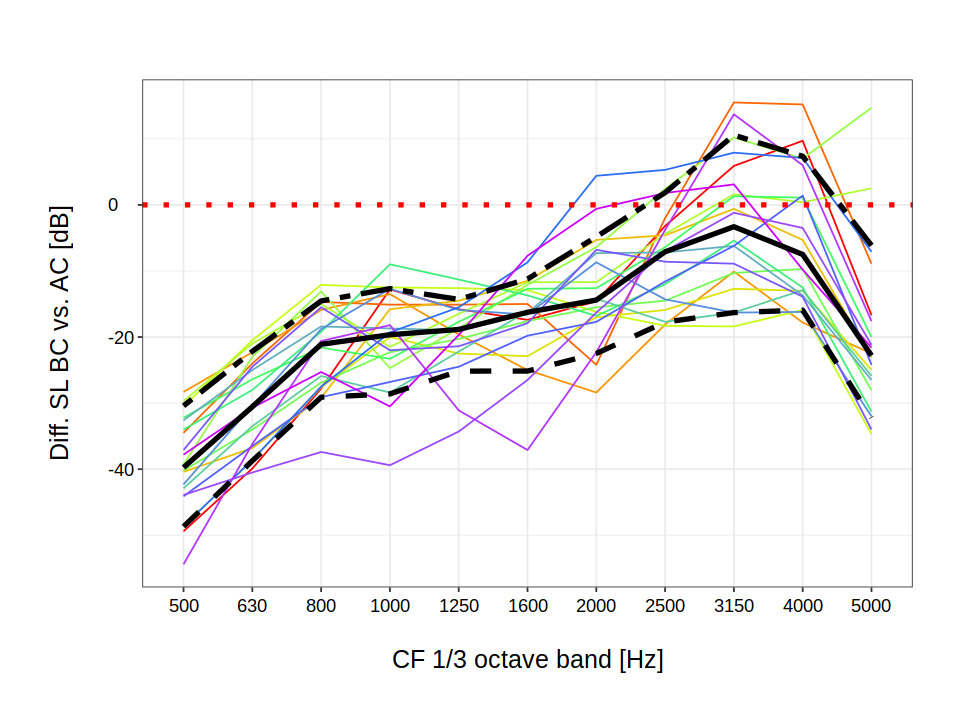

In [13]:
ttl = 'Diff. SL BC vs. AC-path, ISTS 65 dB, at best-ear-side (N=20)'

p <- ggplot(bh5_long, aes(x=Frequency_band, y=Diff_SL, group=Study_ID, colour=BAHA5P_group)) + 
  geom_line() + scale_colour_gradientn(colours=rainbow(5)) + theme_bw() +
  geom_hline(yintercept=0, linetype="dotted", color = "red", linewidth = 1.5)
p <- p + geom_line(P10_long, mapping = aes(x=Frequency_band, y=Diff_SL, group = Percentile), colour="black", linewidth=1.5, linetype='dashed')
p <- p + geom_line(P50_long, mapping = aes(x=Frequency_band, y=Diff_SL, group = Percentile), colour="black", linewidth=1.5, linetype='solid')
p <- p + geom_line(P90_long, mapping = aes(x=Frequency_band, y=Diff_SL, group = Percentile), colour="black", linewidth=1.5, linetype='twodash')
p <- p + ggtitle("") + xlab("CF 1/3 octave band [Hz]") + ylab("Diff. SL BC vs. AC [dB]")
p <- p + theme(plot.margin = margin(1, 1, 1, 1, "cm"), 
               plot.title = element_text(colour="black", size=16, face="bold", hjust=0.5, vjust=1),
               axis.title.x = element_text(colour="black", size=15, face="plain", hjust=0.5, margin = margin(t = .8, r = 0, b = 0, l = 0, 'cm')), 
               axis.title.y = element_text(colour="black", size=15, face="plain", hjust=0.5, vjust=0.5, margin = margin(t = 0, r = .8, b = 0, l = 0, 'cm')),
               axis.text.x = element_text(colour = "black", size = 11, vjust=0), 
               axis.text.y = element_text(colour = "black", size = 11, hjust=0),
               legend.position = "none")

#legend.position = c(0.8, 0.19),
#legend.background = element_rect(size=0.3, linetype="solid", colour ="black"),
#legend.title = element_text(colour="black", size=14, face="plain", margin=margin(0.25, 0.25, 0, 1.1, 'cm')), 
#legend.text = element_text(colour="black", size=12, margin=margin(0.25, 0.25, 0.25, 0.25, 'cm')), 
#legend.margin = margin(0.25, 0.25, 0.25, 0.25, 'cm'),

p

In [14]:
tiff(pout, units="in", width=8, height=6, res=300)
p
dev.off()

png 
  2